In [4]:
import sys 
import sys 
from keyvars import ufiles_path
sys.path.append(ufiles_path)
import uvars
import uviz

In [5]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import networkx as nx
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [6]:
def perform_clustering(data, method='centroid', n_clusters=None):
    """
    Perform clustering based on different methods.

    Parameters:
    - data: Input data for clustering.
    - method: Clustering method ('centroid', 'connectivity', 'density', 'dbscan++', 'graph', 'distribution', 'compression').
    - n_clusters: Number of clusters (applicable to some methods).

    Returns:
    - labels: Cluster labels assigned to each data point.
    """

    if method == 'centroid':
        # Centroid-based clustering using KMeans
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(data)

    elif method == 'connectivity':
        # Connectivity-based clustering using hierarchical clustering
        # (complete linkage)
        connectivity_matrix = np.corrcoef(data.T)
        tree = linkage(connectivity_matrix, method='complete')
        labels = fcluster(tree, t=n_clusters, criterion='maxclust')

    elif method == 'density':
        # Density-based clustering using DBSCAN++
        dbscan = DBSCAN(eps=0.5, min_samples=5)
        labels = dbscan.fit_predict(data)

    elif method == 'dbscan++':
        # Faster and scalable alternative to DBSCAN
        from hdbscan import HDBSCAN
        hdbscan = HDBSCAN(min_cluster_size=5)
        labels = hdbscan.fit_predict(data)

    elif method == 'graph':
        # Graph-based clustering using connected components
        G = nx.from_numpy_matrix(np.corrcoef(data.T) > 0.7)
        labels = list(nx.connected_components(G))

    elif method == 'distribution':
        # Distribution-based clustering using Gaussian Mixture Model
        gmm = GaussianMixture(n_components=n_clusters, random_state=42)
        labels = gmm.fit_predict(data)

    elif method == 'compression':
        # Compression-based clustering using PCA
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(data)
        pca = PCA(n_components=2)
        reduced_data = pca.fit_transform(data_scaled)
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(reduced_data)

    else:
        raise ValueError("Invalid clustering method. Supported methods are: 'centroid', 'connectivity', 'density', 'dbscan++', 'graph', 'distribution', 'compression'.")

    return labels

# Example usage:
# Assuming 'data' is your input data (replace it with your actual data)
# labels = perform_clustering(data, method='centroid', n_clusters=3)


In [7]:
demcols = ['cop', 'edem', 'pband','tdemx']
ftcols = ['cop', 'edem', 'pband', 's1', 'tdemx', 'wc', 'wc_ffth',
       'wc_gau', 'wc_sobelm', 'wc_sobelh', 'wc_sobelv']

fcolx = ['tdemx','edem', 'wc_ffth','wc_gau', 'wc_sobelm', 'wc_sobelh', 'wc_sobelv']
tcol_c = 'pband'

paths = uvars.parqts
df = pd.read_parquet(paths[0])

In [8]:
coords = df[['x','y']]

In [9]:
clust_centroid = perform_clustering(coords, 'centroid', 7)

/home/joseph/miniconda3/envs/dev/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
clust_density = perform_clustering(coords, 'density')

: 

In [41]:
clust_conn = perform_clustering(coords, 'connectivity')

NameError: name 'linkage' is not defined

In [30]:
df['clust_centroid'] = clust_centroid

In [32]:
df.columns

Index(['x', 'y', 'cop', 'edem', 'pband', 's1', 'tdemx', 'wc', 'wc_ffth',
       'wc_gau', 'wc_sobelm', 'wc_sobelh', 'wc_sobelv', 'clust_centroid'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


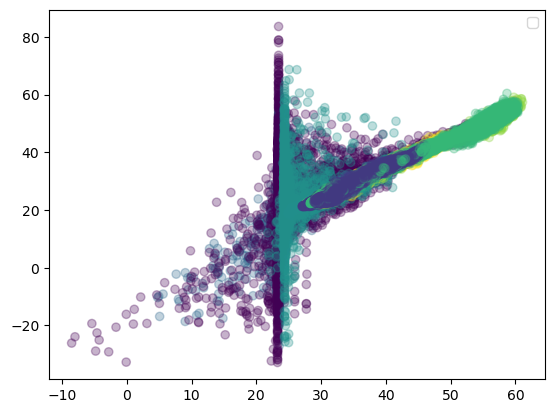

In [40]:
plt.scatter(x=df.edem, y=df.tdemx, c=df.clust_centroid, alpha=0.3)
plt.legend()

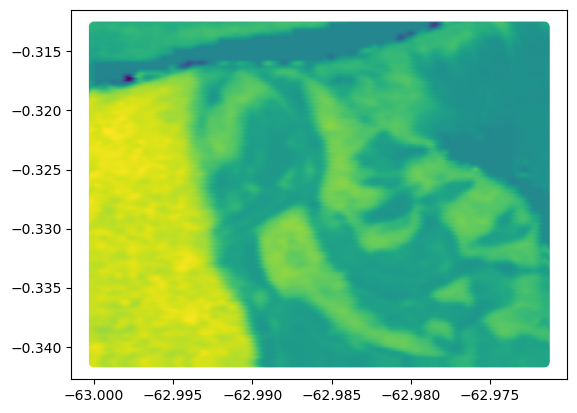

In [37]:
plt.scatter(x=df.x, y=df.y, c=df.edem)